In [18]:
import pandas as pd

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os


print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))  # x_train 배열의 크기를 출력

2.12.0
60000


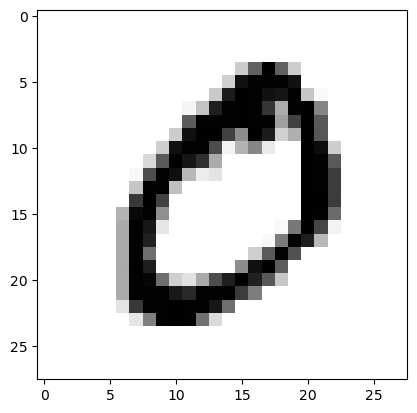

In [12]:
plt.imshow(x_train[1], cmap=plt.cm.binary)

In [3]:
x_train_norm, x_test_norm = x_train / 255.0 , x_test / 255.0

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [8]:
print(f'Model 의 layer 개수: {len(model.layers)}')

Model 의 layer 개수: 7


In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 32)               

In [10]:
# add channel for the B/W image

x_train_reshaped = x_train_norm.reshape(-1, 28, 28, 1)
x_test_reshaped = x_test_norm.reshape(-1, 28, 28, 1)

print(x_train_reshaped.shape)

(60000, 28, 28, 1)


In [11]:
# model training

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10


2024-03-06 11:52:01.082762: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-03-06 11:52:01.457250: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 22s 9ms/step - loss: 0.2032 - accuracy: 0.9388
Epoch 2/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0847 - accuracy: 0.9749
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0838 - accuracy: 0.9780
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1234 - accuracy: 0.9758
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2092 - accuracy: 0.9760
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4874 - accuracy: 0.9724
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.9156 - accuracy: 0.9717
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 1.5300 - accuracy: 0.9703
Epoch 9/10
1875/1875 [==============================] - 20s 11ms/step - loss: 2.5424 - accuracy: 0.9706
Epoch 10/10
1875/1875 [==============================] - 21s 11ms/step - loss: 3.

In [13]:
# Test

test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(test_loss, test_accuracy)

2024-03-06 11:59:59.766980: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 - 2s - loss: 5.6506 - accuracy: 0.9624 - 2s/epoch - 7ms/step
5.650647163391113 0.9624000191688538


In [14]:
# 정답 확인

pred_result = model.predict(x_test_reshaped)
pred_labels = np.argmax(pred_result, axis = 1)

idx = 0

print('pred 결과: ', pred_result[idx], '\n 예측치: ', pred_labels[idx], '\n정답: ', y_test[idx])

  3/313 [..............................] - ETA: 7s  

2024-03-06 12:03:49.755267: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step
pred 결과:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] 
 예측치:  7 
정답:  7


pred: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
answer: 5, 예측 결과0


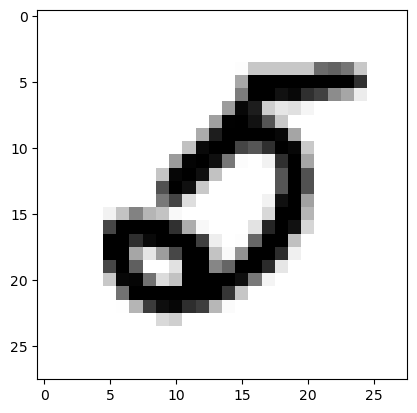

pred: [0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 6.490621e-36 0.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00]
answer: 5, 예측 결과8


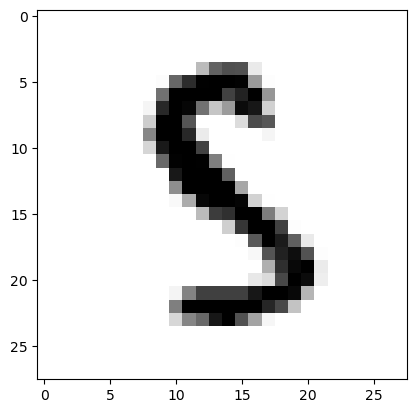

pred: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
answer: 0, 예측 결과1


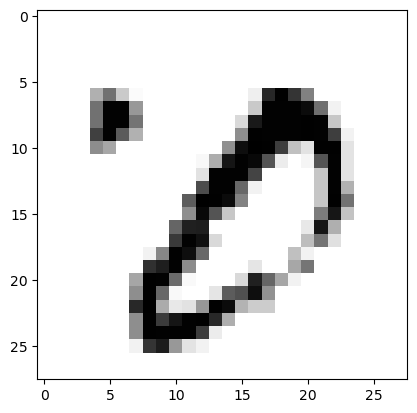

pred: [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 7.7620553e-16]
answer: 9, 예측 결과8


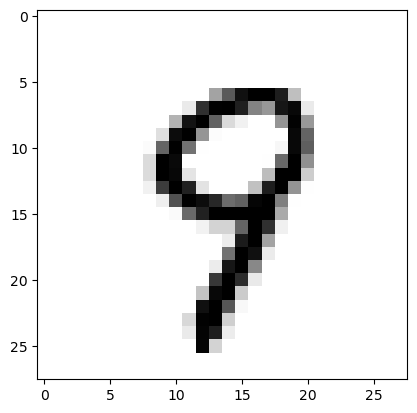

pred: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
answer: 9, 예측 결과4


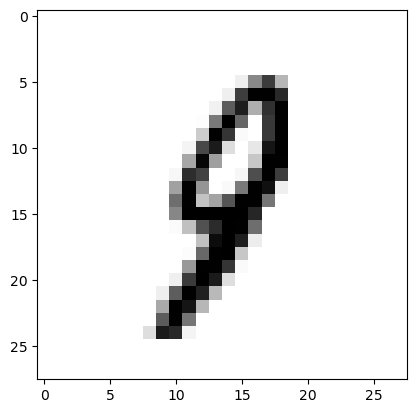

In [16]:
# 모델이 틀린 경우 확인

import random

wrong_pred_list = []

for i, _ in enumerate(pred_labels):
    if pred_labels[i] != y_test[i]:
        wrong_pred_list.append(i)
        
#wrong pred e.g.
samples = random.choices(population=wrong_pred_list, k=5)

for n in samples:
    print('pred: ' + str(pred_result[n]))
    print('answer: ' + str(y_test[n]) +', 예측 결과' +str(pred_labels[n]))
    
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show();

In [19]:
# GPT code for RandomsearchCV

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define a function to create the Keras model with hyperparameters as arguments
def create_model(n_channel_1=8, n_channel_2=16, n_dense=32):
    model = keras.Sequential([
        keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Flatten(),
        keras.layers.Dense(n_dense, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model so it can be used by scikit-learn
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the hyperparameters grid to be randomized over
param_dist = {
    'n_channel_1': [8, 16, 32],
    'n_channel_2': [16, 32, 64],
    'n_dense': [16, 32, 64],
    'epochs': [5, 7, 10]  # You can also tune other parameters like batch size
}

# Create a RandomizedSearchCV instance and fit it
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3, verbose=2)
random_search_result = random_search.fit(x_train_reshaped, y_train)

# Summarize results
print("Best: %f using %s" % (random_search_result.best_score_, random_search_result.best_params_))
means = random_search_result.cv_results_['mean_test_score']
stds = random_search_result.cv_results_['std_test_score']
params = random_search_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


/var/folders/h6/51v9gvc533zc454hnmsmngvc0000gn/T/ipykernel_6747/1609173716.py:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


2024-03-06 12:41:59.221566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-06 12:43:26.966816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[CV] END epochs=7, n_channel_1=32, n_channel_2=32, n_dense=64; total time= 1.6min


2024-03-06 12:43:33.254484: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-06 12:45:39.586464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[CV] END epochs=7, n_channel_1=32, n_channel_2=32, n_dense=64; total time= 2.2min


2024-03-06 12:45:43.460246: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-06 12:47:00.532436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[CV] END epochs=7, n_channel_1=32, n_channel_2=32, n_dense=64; total time= 1.4min


2024-03-06 12:47:08.941542: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-06 12:48:24.263849: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[CV] END epochs=7, n_channel_1=8, n_channel_2=64, n_dense=32; total time= 1.3min


2024-03-06 12:48:27.653774: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-06 12:50:22.729102: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[CV] END epochs=7, n_channel_1=8, n_channel_2=64, n_dense=32; total time= 2.0min


2024-03-06 12:50:29.692029: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-06 12:52:15.314900: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[CV] END epochs=7, n_channel_1=8, n_channel_2=64, n_dense=32; total time= 1.8min


2024-03-06 12:52:18.399723: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-06 12:53:02.257229: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[CV] END epochs=5, n_channel_1=8, n_channel_2=32, n_dense=64; total time=  46.9s


2024-03-06 12:53:05.319978: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-06 12:53:49.184094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[CV] END epochs=5, n_channel_1=8, n_channel_2=32, n_dense=64; total time=  46.9s


2024-03-06 12:53:52.229468: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-06 12:54:49.106068: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[CV] END epochs=5, n_channel_1=8, n_channel_2=32, n_dense=64; total time= 1.0min


2024-03-06 12:54:53.201288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-06 12:55:40.058452: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[CV] END epochs=5, n_channel_1=16, n_channel_2=32, n_dense=16; total time=  50.3s


2024-03-06 12:55:43.413007: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-06 12:56:35.539604: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[CV] END epochs=5, n_channel_1=16, n_channel_2=32, n_dense=16; total time=  55.5s


2024-03-06 12:56:39.050008: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-06 12:57:24.729405: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[CV] END epochs=5, n_channel_1=16, n_channel_2=32, n_dense=16; total time=  49.0s


2024-03-06 12:57:27.888642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-06 12:58:55.896487: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[CV] END epochs=10, n_channel_1=8, n_channel_2=16, n_dense=16; total time= 1.5min


2024-03-06 12:58:58.966546: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-06 13:00:26.569092: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[CV] END epochs=10, n_channel_1=8, n_channel_2=16, n_dense=16; total time= 1.5min


2024-03-06 13:00:29.712589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-06 13:01:56.941183: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[CV] END epochs=10, n_channel_1=8, n_channel_2=16, n_dense=16; total time= 1.5min


2024-03-06 13:02:00.073915: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-06 13:03:17.116636: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[CV] END epochs=7, n_channel_1=32, n_channel_2=64, n_dense=64; total time= 1.3min


2024-03-06 13:03:20.655220: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-06 13:04:30.729727: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[CV] END epochs=7, n_channel_1=32, n_channel_2=64, n_dense=64; total time= 1.2min


2024-03-06 13:04:34.468218: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-06 13:05:44.490795: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[CV] END epochs=7, n_channel_1=32, n_channel_2=64, n_dense=64; total time= 1.2min


2024-03-06 13:05:48.391712: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-06 13:06:51.964414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[CV] END epochs=7, n_channel_1=8, n_channel_2=32, n_dense=64; total time= 1.1min


2024-03-06 13:06:55.178771: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-06 13:07:56.174516: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[CV] END epochs=7, n_channel_1=8, n_channel_2=32, n_dense=64; total time= 1.1min


2024-03-06 13:07:59.389621: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-06 13:09:02.792266: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[CV] END epochs=7, n_channel_1=8, n_channel_2=32, n_dense=64; total time= 1.1min


2024-03-06 13:09:05.879805: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-06 13:10:33.672915: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[CV] END epochs=10, n_channel_1=8, n_channel_2=32, n_dense=64; total time= 1.5min


2024-03-06 13:10:36.714736: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-06 13:12:02.149779: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[CV] END epochs=10, n_channel_1=8, n_channel_2=32, n_dense=64; total time= 1.5min


2024-03-06 13:12:05.193829: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-06 13:13:30.698069: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[CV] END epochs=10, n_channel_1=8, n_channel_2=32, n_dense=64; total time= 1.5min


2024-03-06 13:13:33.709182: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-06 13:15:01.259112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[CV] END epochs=10, n_channel_1=16, n_channel_2=32, n_dense=32; total time= 1.5min


2024-03-06 13:15:04.373406: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-06 13:16:33.126123: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[CV] END epochs=10, n_channel_1=16, n_channel_2=32, n_dense=32; total time= 1.5min


2024-03-06 13:16:36.139935: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-06 13:18:03.395377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[CV] END epochs=10, n_channel_1=16, n_channel_2=32, n_dense=32; total time= 1.5min


2024-03-06 13:18:06.498287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-06 13:18:51.940539: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[CV] END epochs=5, n_channel_1=8, n_channel_2=64, n_dense=32; total time=  48.7s


2024-03-06 13:18:55.174294: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-06 13:19:40.580662: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[CV] END epochs=5, n_channel_1=8, n_channel_2=64, n_dense=32; total time=  48.5s


2024-03-06 13:19:43.668665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-06 13:20:28.946201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[CV] END epochs=5, n_channel_1=8, n_channel_2=64, n_dense=32; total time=  48.5s


2024-03-06 13:20:32.172667: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Best: 0.980033 using {'n_dense': 32, 'n_channel_2': 64, 'n_channel_1': 8, 'epochs': 5}
0.972033 (0.009041) with: {'n_dense': 64, 'n_channel_2': 32, 'n_channel_1': 32, 'epochs': 7}
0.973967 (0.000772) with: {'n_dense': 32, 'n_channel_2': 64, 'n_channel_1': 8, 'epochs': 7}
0.974183 (0.006649) with: {'n_dense': 64, 'n_channel_2': 32, 'n_channel_1': 8, 'epochs': 5}
0.973067 (0.006351) with: {'n_dense': 16, 'n_channel_2': 32, 'n_channel_1': 16, 'epochs': 5}
0.958883 (0.014342) with: {'n_dense': 16, 'n_channel_2': 16, 'n_channel_1': 8, 'epochs': 10}
0.978250 (0.003443) with: {'n_dense': 64, 'n_channel_2': 64, 'n_channel_1': 32, 'epochs': 7}
0.974900 (0.006013) with: {'n_dense': 64, 'n_channel_2': 32, 'n_channel_1': 8, 'epochs': 7}
0.972867 (0.002211) with: {'n_dense': 64, 'n_channel_2': 32, 'n_channel_1': 8, 'epochs': 10}
0.973933 (0.003747) with: {'n_dense': 32, 'n_channel_2': 32, 'n_channel_1': 16, 'epochs': 10}
0.980033 (0.001062) with: {'n_dense': 32, 'n_channel_2': 64, 'n_channel_1': 8,

In [20]:
conda install -c conda-forge jupyterlab-git

Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/noarch::jupyter_contrib_core==0.4.0=pyhd8ed1ab_0
  - defaults/osx-arm64::_anaconda_depends==2023.09=py311_openblas_1
  - defaults/osx-arm64::python-lsp-black==1.2.1=py311hca03da5_0
  - defaults/osx-arm64::jupyter_console==6.6.3=py311hca03da5_0
  - defaults/osx-arm64::notebook==6.5.4=py311hca03da5_1
  - conda-forge/noarch::jupyter_highlight_selected_word==0.2.0=pyhd8ed1ab_1006
  - defaults/noarch::pyls-spyder==0.4.0=pyhd3eb1b0_0
  - defaults/osx-arm64::jupyterlab==3.6.3=py311hca03da5_0
  - defaults/osx-arm64::spyder==5.4.3=py311hca03da5_1
  - defaults/osx-arm64::nbclassic==0.5.5=py311hca03da5_0
  - defaults/osx-arm64::qtconsole==5.4.2=py311hca03da5_0
  - defaults/osx-arm64::ipython==8.15.0=py311hca03da5_0
  - defaults/osx-arm64::python-lsp-server==1.7.2=py311hca03da5_0
  - conda-forge/noarch::jupyter_contrib_nbextensions=

In [ ]:
conda install -c conda-forge jupyterlab_execute_time

Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: - 

In [1]:
conda install lckr-jupyterlab-variableinspector

Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - lckr-jupyterlab-variableinspector

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-arm64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-arm64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install -c conda-forge jupyterlab-system-monitor

done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.9.0
  latest version: 24.1.2

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.1.2



## Package Plan ##

  environment location: /Users/leegen/anaconda3

  added / updated specs:
    - jupyterlab-system-monitor


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    jupyter-resource-usage-0.7.1|     pyhd8ed1ab_0          33 KB  conda-forge
    jupyterlab-system-monitor-0.8.0|     pyhd8ed1ab_2          30 KB  conda-forge
    jupyterlab-topbar-0.6.1    |     pyhd8ed1ab_2          20 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          84 KB

The following NEW packages will be INST

In [3]:
conda install -c conda-forge jupyterlab-variableinspector

done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.9.0
  latest version: 24.1.2

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.1.2



## Package Plan ##

  environment location: /Users/leegen/anaconda3

  added / updated specs:
    - jupyterlab-variableinspector


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    jupyterlab-variableinspector-3.2.1|     pyhd8ed1ab_0         126 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         126 KB

The following NEW packages will be INSTALLED:

  jupyterlab-variab~ conda-forge/noarch::jupyterlab-variableinspector-3.2.1-pyhd8ed1ab_0 



                                                  